In [ ]:
import torch
import torch.nn as nn
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
from glob import glob
import json

project_path = os.path.dirname(os.getcwd())
config_file = os.path.join(os.path.join(project_path, "config.json"))
config = json.load(open(config_file, "rb"))
patch_root = config["candidate_patch"] 
ct_root = config["ct_root"]
ct_list = glob(os.path.join(ct_root, "*/*.mhd"))
patch_list = glob(os.path.join(patch_root, "*.npy"))    

961 -2048


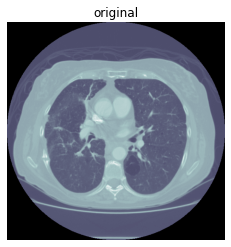

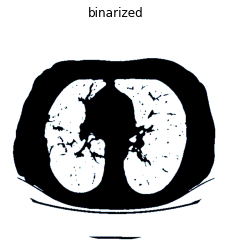

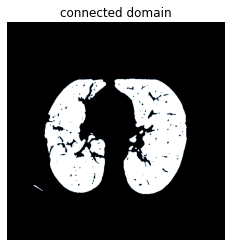

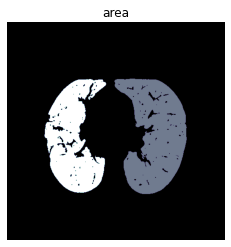

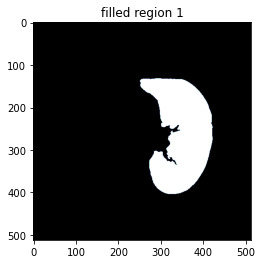

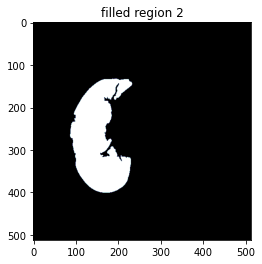

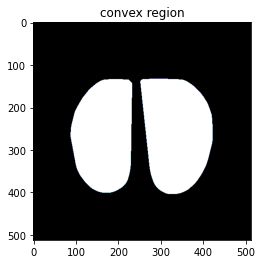

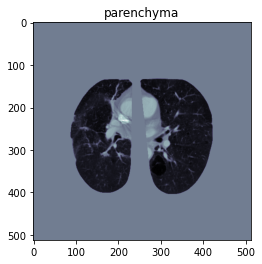

In [25]:
# show image
from skimage.morphology import binary_erosion, convex_hull_image, binary_closing, disk
from skimage.measure import regionprops, label
from skimage.filters import roberts
from skimage.segmentation import clear_border
from scipy import ndimage
img = sitk.ReadImage(ct_list[0])
arr = sitk.GetArrayFromImage(img)
for i, slice in enumerate(arr):
    if i == 60:
        # fig 1
        print(slice.max(), slice.min())
        plt.figure(0)
        plt.title("original")
        plt.imshow(slice, cmap="bone")
        plt.axis("off")
        plt.show()
        plt.close(0)

        # fig 2
        plt.figure(0)
        plt.title("binarized")
        threshold = -600
        binarized = slice.copy()
        binarized = slice < -600
        plt.imshow(binarized, cmap="bone")
        plt.axis("off")
        plt.show()
        plt.close(0)

        # fig 3
        plt.figure(0)
        plt.title("connected domain")
        _ = clear_border(binarized)
        plt.imshow(_, cmap="bone")
        plt.axis("off")
        plt.show()
        plt.close(0)

        # fig 4
        label_img = label(_)
        plt.figure(0)
        plt.title("area")
        areas = [r.area for r in regionprops(label_img)]
        areas.sort()
        labels = []
        if len(areas) > 2:
            for region in regionprops(label_img):
                if region.area < areas[-2]:
                    for x, y in region.coords:
                        label_img[x, y] = 0
                else:
                    x, y = region.coords[0]
                    labels.append(label_img[x, y])
        else:
            labels = [1, 2]
        plt.axis("off")
        plt.imshow(label_img, cmap="bone")
        plt.show()
        plt.close(0)

        # fig 5
        l = label_img == labels[0]
        r = label_img == labels[1]
        l_edge = roberts(l)
        r_edge = roberts(r)
        l_region = ndimage.binary_fill_holes(l_edge)
        r_region = ndimage.binary_fill_holes(r_edge)
        plt.figure(0)
        plt.title("filled region 1")
        plt.imshow(l_region, cmap="bone")
        plt.show()
        plt.close(0)
        plt.figure(0)
        plt.title("filled region 2")
        plt.imshow(r_region, cmap="bone")
        plt.show()
        plt.close(0)

        # fig 6
        l = convex_hull_image(l)
        r = convex_hull_image(r)
        _ = label_img.copy()
        _[l==1] = 1
        _[r==1] = 1
        closing_img = binary_closing(_, selem=disk(10))
        plt.figure(0)
        plt.title("convex region")
        plt.imshow(_, cmap="bone")
        plt.show()
        plt.close(0)

        # fig 7
        plt.figure(0)
        plt.title("parenchyma")
        plt.imshow(slice*_, cmap="bone")
        plt.show()
        plt.close(0)

    else:
        continue


In [ ]:
# show patch

patch = patch_list[0]
arr = np.load(patch).astype(np.float32)
print("image shape:", arr.shape)
for i, slice in enumerate(arr):
    plt.figure(0)
    plt.title(f"{i}")
    plt.imshow(slice, cmap="bone")
    plt.show()
    plt.close(0)